<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :** As per the given dataset we are supposed to find the best ad or such a ad which is having maximum naumber of clicks in given span so that we can rather use that one ad itself in order to maximise the
 profit that we get from the website. Each ad has a fixed conversion rate.

# Importing libraries and dataset


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dataSet = pd.read_csv("Ads_CTR_Optimisation.csv")

In [32]:
dataSet

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# Implementing UCB

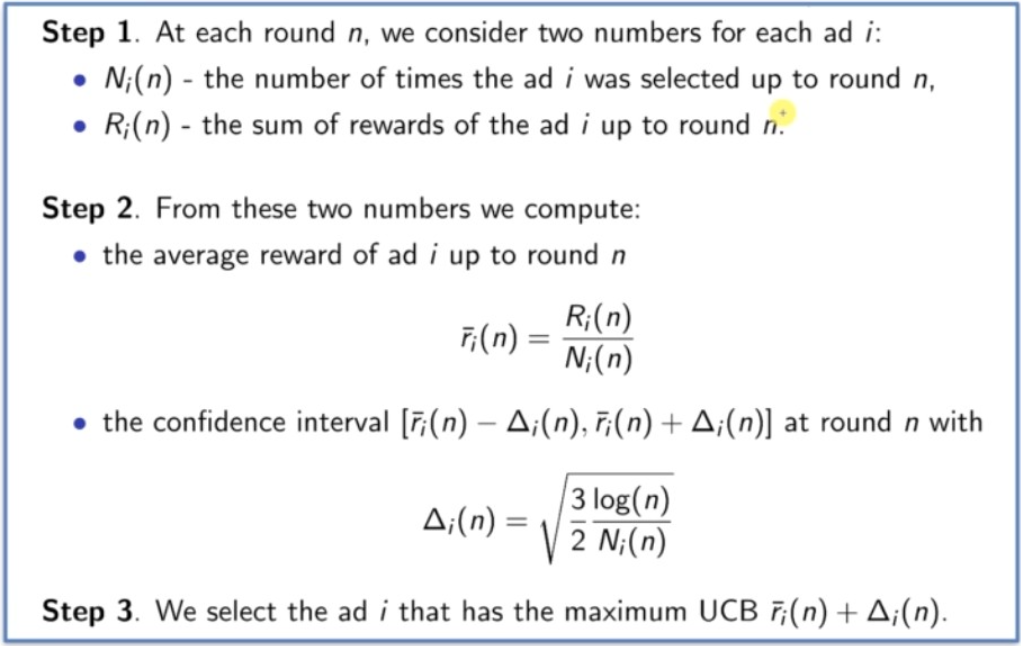

In [61]:
import math
# number of users
N  = 10000
# number of ads
d = 10
# list containing selected ads
ads_selected = []
# number of times ad was selected upto round n
numbers_of_selections = [0]*d
# sum of rewards upto round N
sums_of_rewards = [0]*d
# total rewards
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataSet.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

# Visualising Results

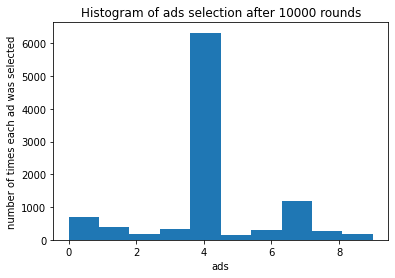

In [56]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 10000 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

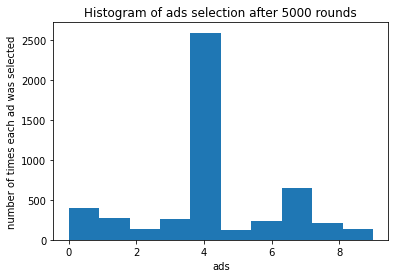

In [58]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 5000 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

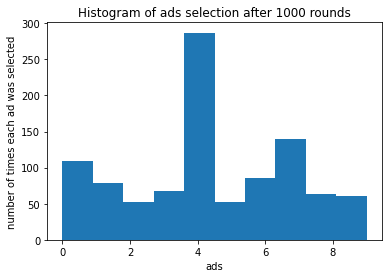

In [60]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 1000 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

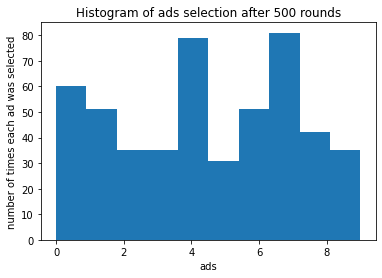

In [62]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 500 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

**CONCLUSION :** As per above results we can conclude that more we explore better are the results.
If carefully observed we can say that when we are having 500 rounds the algorithm might select the 8th ad whereas after 10000 rounds 5th ad is superior to other ads. So we might have made a mistake by selecting improper ad with less number of rounds.
Hence as per conclusion we should try to explore more rather than exploiting on current result assuming it is better as compared to other results

In [52]:
total_reward # 10000 rounds

2178

In [53]:
numbers_of_selections # 10000 rounds

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [54]:
sums_of_rewards # 10000 rounds

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [55]:
ads_selected # 10000 rounds

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 0,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 9,
 7,
 0,
 6,
 8,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 9,
 7,
 0,
 0,
 6,
 8,
 4,
 0,
 7,
 1,
 1,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 0,
 0,
 7,
 0,
 4,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 7,
 0,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 0,
 7,
 7,
 4,
 7,
 7,
 7,
 1,
 6,
 8,
 0,
 4,
 4,
 2,
 3,
 5,
 9,
 4,
 7,
 0,
 7,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 8,
 4,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 0,
 6,
 4,
 1,
 1,
 1,
 8,
 7,
 2,
 3,
 5,
 9,
 4,
 0,
 1,
 1,
 1,
 6,
 7,
 8,
 4,
 1,
 2,
 3,
 5,
 9,
 0,
 6,
 7,
 8,
 4,
 7,
 1,
 0,
 6,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 1,
 0,
 6,
 6,
 6,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 7,
 0,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 7,
 4,
 8,
 0,
 7,
